# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook implements Principal Component Analysis (PCA) from scratch. I'm using World Bank development indicators for Sub-Saharan Africa.

## Dataset: Sub-Saharan Africa Development Indicators (World Bank)
The data covers economic, social, and environmental metrics from 2000-2023.

### Step 0: Import Libraries and Load Data
Import libraries and load the prepared dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported.")

Libraries imported.


In [2]:
# Load the prepared data
data = pd.read_csv('prepared_data_for_pca.csv', index_col=0)

print(f"Dataset Shape: {data.shape}")
print(f"Observations (Years): {data.shape[0]}")
print(f"Features (Indicators): {data.shape[1]}")
print(f"\nFirst few rows:")
data.head()

Dataset Shape: (24, 20)
Observations (Years): 24
Features (Indicators): 20

First few rows:


,Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Merchandise exports (current US$),Insurance and financial services (% of commercial service exports),"Computer, communications and other services (% of commercial service imports)","Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports),Merchandise imports from high-income economies (% of total merchandise imports),Manufactures imports (% of merchandise imports),Food imports (% of merchandise imports),Urban population growth (annual %),"Population, female (% of total population)",Age dependency ratio (% of working-age population),"Population ages 75-79, male (% of male population)",Population ages 65 and above (% of total population),"Population ages 65 and above, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 50-54, male (% of male population)","Population ages 40-44, male (% of male population)","Population ages 30-34, male (% of male population)"
2000,14.554548,0.253925,9.526914e+10,5.756433,30.526571,0.039516,1.999294,66.083733,65.990919,12.502286,4.017799,50.530379,91.683856,0.448433,2.999621,3.301436,1.559701,2.569774,3.985142,6.027084
2001,14.064753,0.082889,9.059408e+10,5.284099,32.047382,0.046969,2.642309,65.815117,65.778034,13.223241,4.085939,50.514955,91.335563,0.448116,2.995339,3.301073,1.556379,2.560868,4.002642,6.054031
2002,15.883310,0.239403,9.659724e+10,3.844079,32.603057,0.039177,2.331307,64.773943,67.670222,13.371448,4.123941,50.495800,91.017015,0.448763,2.991318,3.300617,1.553515,2.553865,4.018296,6.079707
2003,18.833485,0.257466,1.181937e+11,3.705136,29.113823,0.017389,2.564815,61.509978,66.153150,13.465554,4.160411,50.472422,90.720033,0.450363,2.987050,3.299366,1.551252,2.553509,4.028070,6.102200
2004,20.271411,0.640484,1.599013e+11,4.455624,27.380443,0.058662,2.895586,60.190008,66.523930,12.071317,4.210697,50.449314,90.451396,0.452308,2.981896,3.296565,1.550257,2.557050,4.032438,6.121583


Verification of Standardization:
Mean of each feature (should be close to 0):
[-1.85037171e-16 -3.70074342e-16  3.70074342e-17 -5.18104078e-16
  1.20274161e-15  8.78926561e-17  3.35379872e-16 -9.43689571e-16
  8.51170986e-16  1.29526020e-16  2.61827597e-15  7.07027030e-14
 -2.22044605e-15 -1.08616819e-14  2.29446092e-15 -2.07241631e-15
 -6.34677496e-15 -1.20274161e-15 -6.47630098e-16  1.55431223e-15]

Standard deviation of each feature (should be close to 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


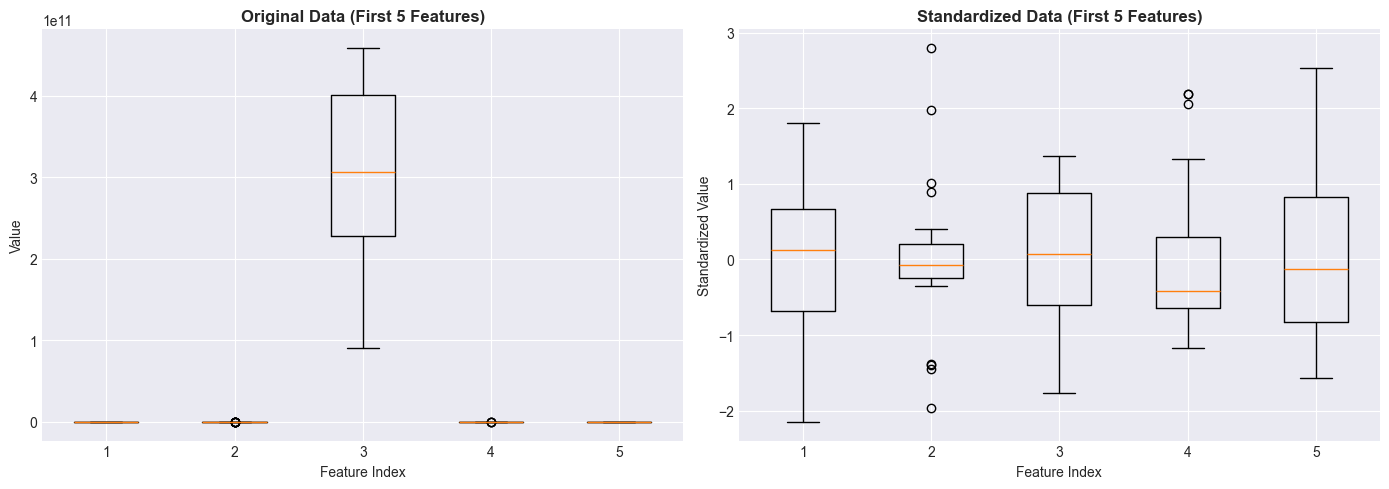

In [5]:
# Verify standardization
print("Verification of Standardization:")
print(f"Mean of each feature (should be close to 0):")
print(np.mean(standardized_data, axis=0))
print(f"\nStandard deviation of each feature (should be close to 1):")
print(np.std(standardized_data, axis=0))

# Visualize before and after standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original data
axes[0].boxplot(data_array[:, :5])
axes[0].set_title('Original Data (First 5 Features)', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Feature Index')

# Standardized data
axes[1].boxplot(standardized_data[:, :5])
axes[1].set_title('Standardized Data (First 5 Features)', fontweight='bold')
axes[1].set_ylabel('Standardized Value')
axes[1].set_xlabel('Feature Index')

plt.tight_layout()
plt.show()

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

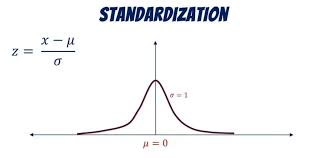


In [4]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
# Convert to numpy array
data_array = data.values

# Calculate mean and standard deviation for each feature
data_mean = np.mean(data_array, axis=0)
data_std = np.std(data_array, axis=0)

# Standardize: (Data - Mean) / Standard Deviation
standardized_data = (data_array - data_mean) / data_std

print(f"Standardized Data Shape: {standardized_data.shape}")
print(f"\nFirst 5 rows of standardized data:")
standardized_data[:5]

Standardized Data Shape: (24, 20)

First 5 rows of standardized data:


array([[-1.99940774, -1.39659124, -1.73097985, -0.39716729, -0.7923023 ,
         0.10377542, -1.39541796,  1.95807307,  0.56801382, -0.34294181,
         0.4234382 ,  1.78780483,  1.25360895, -0.17305218, -0.06092318,
        -0.34682647, -0.48146549, -0.88144214, -1.11535993, -1.59709706],
       [-2.14734543, -1.96338227, -1.7709289 , -0.57656899, -0.41465599,
         0.26875667,  0.13407176,  1.91300226,  0.48621464,  0.30816595,
         0.78273373,  1.66077766,  1.15170022, -0.23506621, -0.13701592,
        -0.35194496, -0.54869573, -0.96410118, -1.0282493 , -1.47200022],
       [-1.59806907, -1.44471499, -1.71963108, -1.12351617, -0.2766713 ,
         0.09625858, -0.60568482,  1.7383052 ,  1.21327323,  0.4420141 ,
         0.98311859,  1.50303133,  1.05849465, -0.1085217 , -0.20847412,
        -0.35835817, -0.6066569 , -1.02910237, -0.9503286 , -1.35280245],
       [-0.70699933, -1.38485515, -1.53508644, -1.17628937, -1.14311467,
        -0.38606835, -0.05025709,  1.19064915,  

### Step 2: Verify Standardization
Let's verify that our standardization worked correctly by checking the mean and standard deviation.

### Step 5b: Visualize Explained Variance
Visualize how much variance is explained by each principal component.

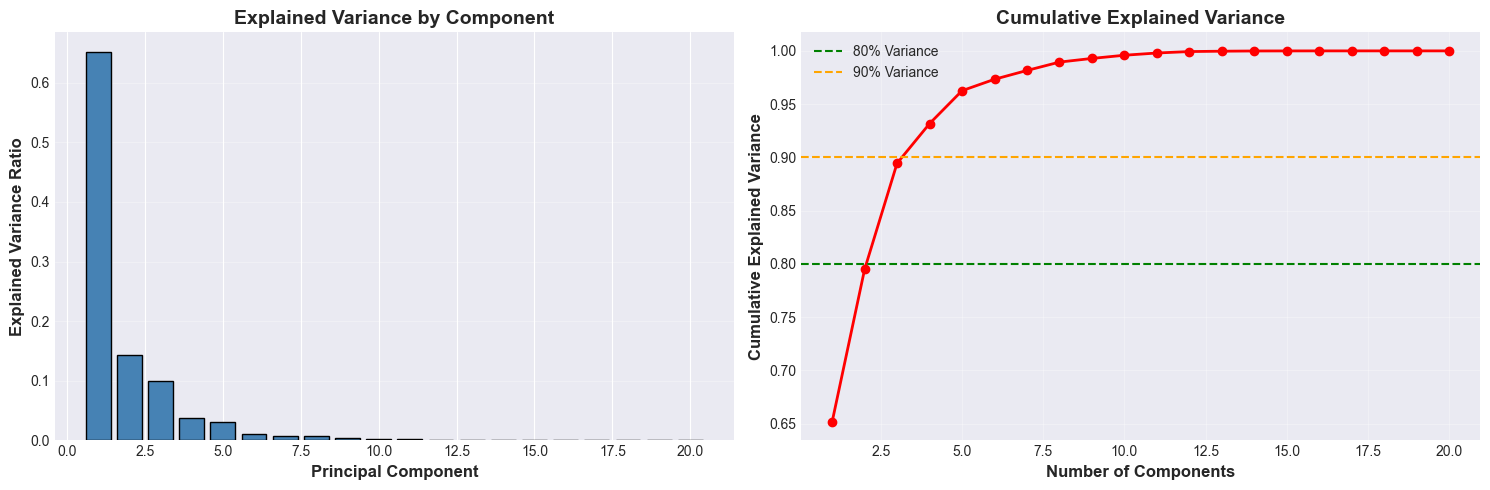

Components needed for 80.0% variance: 3
Components needed for 90.0% variance: 4
Components needed for 95.0% variance: 5


In [15]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Individual explained variance
axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontweight='bold', fontsize=12)
axes[0].set_title('Explained Variance by Component', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 
             'ro-', linewidth=2, markersize=6)
axes[1].axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
axes[1].axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
axes[1].set_xlabel('Number of Components', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontweight='bold', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontweight='bold', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 80% and 90% variance
for threshold in [0.8, 0.9, 0.95]:
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print(f"Components needed for {threshold*100}% variance: {n_components}")

In [14]:
# Step 7: Project data onto selected principal components
# Projection: Z = X * V, where X is standardized data and V is selected eigenvectors
reduced_data = np.dot(standardized_data, selected_components)

print(f"Original Data Shape: {standardized_data.shape}")
print(f"Reduced Data Shape: {reduced_data.shape}")
print(f"Dimensionality Reduction: {data_array.shape[1]} -> {num_components} features")
print(f"\nFirst 5 rows of reduced data:")
print(reduced_data[:5])

Original Data Shape: (24, 20)
Reduced Data Shape: (24, 3)
Dimensionality Reduction: 20 -> 3 features

First 5 rows of reduced data:
[[ 3.7612613   1.53093524  2.78800382]
 [ 4.07280983  1.40121539  2.3410324 ]
 [ 3.9012066   0.91612405  2.47673523]
 [ 3.63693681  0.53235639  1.69784508]
 [ 3.64036532  0.98605971 -0.34703244]]


Covariance Matrix Shape: (20, 20)
Covariance Matrix (first 5x5):
[[1.04347826 0.5181076  0.71377329 0.2832915  0.52558393]
 [0.5181076  1.04347826 0.67482423 0.8584961  0.65420281]
 [0.71377329 0.67482423 1.04347826 0.44052251 0.44366794]
 [0.2832915  0.8584961  0.44052251 1.04347826 0.83505488]
 [0.52558393 0.65420281 0.44366794 0.83505488 1.04347826]]


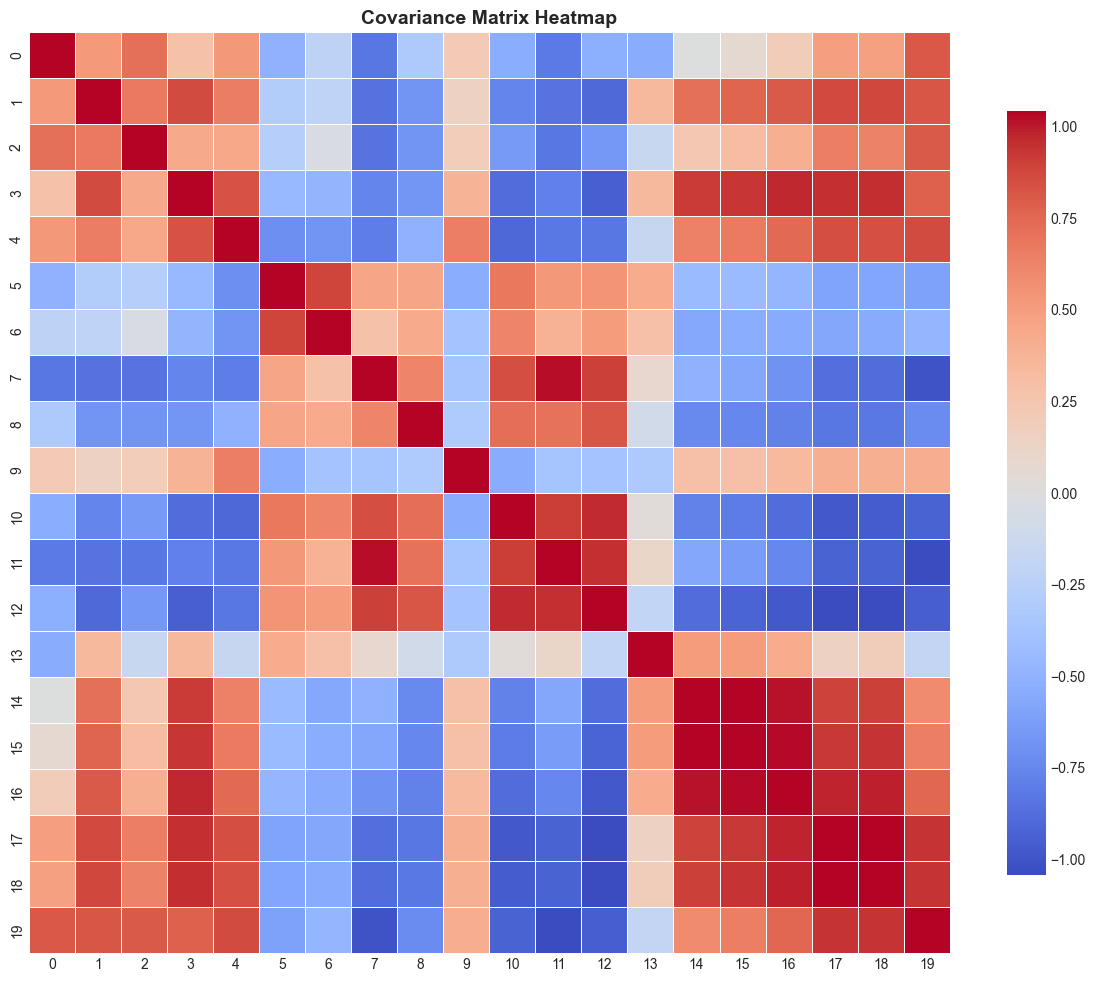

In [10]:
# Step 3: Calculate the Covariance Matrix
# Formula: Cov(X) = (X^T * X) / (n - 1)
# Where X is the standardized data and n is the number of observations

n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print(f"Covariance Matrix Shape: {cov_matrix.shape}")
print(f"Covariance Matrix (first 5x5):")
print(cov_matrix[:5, :5])

# Visualize covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='coolwarm', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Covariance Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [11]:
# Step 4: Perform Eigendecomposition
# Calculate eigenvalues and eigenvectors using np.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Number of Eigenvalues: {len(eigenvalues)}")
print(f"Eigenvalues (first 10):")
print(eigenvalues[:10])
print(f"\nEigenvectors Shape: {eigenvectors.shape}")
print(f"First Eigenvector (first 5 elements):")
print(eigenvectors[:5, 0])

Number of Eigenvalues: 20
Eigenvalues (first 10):
[13.59887157  2.98924554  2.07940158  0.77656788  0.64529951  0.22373462
  0.17281959  0.16397021  0.07186269  0.06239354]

Eigenvectors Shape: (20, 20)
First Eigenvector (first 5 elements):
[-0.15052483 -0.23319088 -0.18005163 -0.25062009 -0.23750307]


In [12]:
# Step 5: Sort eigenvalues and eigenvectors in descending order
# Sort by eigenvalue magnitude
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues (Largest to Smallest):")
for i, eigen_val in enumerate(sorted_eigenvalues[:10], 1):
    print(f"PC{i}: {eigen_val:.4f}")

# Calculate explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio (first 10 components):")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print(f"\nCumulative Variance (first 10 components):")
for i in range(min(10, len(cumulative_variance_ratio))):
    print(f"PC{1}-PC{i+1}: {cumulative_variance_ratio[i]:.4f} ({cumulative_variance_ratio[i]*100:.2f}%)")

Sorted Eigenvalues (Largest to Smallest):
PC1: 13.5989
PC2: 2.9892
PC3: 2.0794
PC4: 0.7766
PC5: 0.6453
PC6: 0.2237
PC7: 0.1728
PC8: 0.1640
PC9: 0.0719
PC10: 0.0624

Explained Variance Ratio (first 10 components):
PC1: 0.6516 (65.16%)
PC2: 0.1432 (14.32%)
PC3: 0.0996 (9.96%)
PC4: 0.0372 (3.72%)
PC5: 0.0309 (3.09%)
PC6: 0.0107 (1.07%)
PC7: 0.0083 (0.83%)
PC8: 0.0079 (0.79%)
PC9: 0.0034 (0.34%)
PC10: 0.0030 (0.30%)

Cumulative Variance (first 10 components):
PC1-PC1: 0.6516 (65.16%)
PC1-PC2: 0.7948 (79.48%)
PC1-PC3: 0.8945 (89.45%)
PC1-PC4: 0.9317 (93.17%)
PC1-PC5: 0.9626 (96.26%)
PC1-PC6: 0.9733 (97.33%)
PC1-PC7: 0.9816 (98.16%)
PC1-PC8: 0.9895 (98.95%)
PC1-PC9: 0.9929 (99.29%)
PC1-PC10: 0.9959 (99.59%)


In [13]:
# Step 6: Select number of components based on variance threshold (85%)
variance_threshold = 0.85
num_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

print(f"Variance Threshold: {variance_threshold*100}%")
print(f"Number of Components Selected: {num_components}")
print(f"Cumulative Variance Captured: {cumulative_variance_ratio[num_components-1]:.4f} ({cumulative_variance_ratio[num_components-1]*100:.2f}%)")

# Get selected principal components
selected_components = sorted_eigenvectors[:, :num_components]
print(f"\nSelected Components Shape: {selected_components.shape}")

Variance Threshold: 85.0%
Number of Components Selected: 3
Cumulative Variance Captured: 0.8945 (89.45%)

Selected Components Shape: (20, 3)


### Step 7b: Create DataFrame with Reduced Data
Convert the reduced data to a DataFrame for better visualization.

In [16]:
# Create DataFrame with reduced data
pc_columns = [f'PC{i+1}' for i in range(num_components)]
reduced_df = pd.DataFrame(reduced_data, columns=pc_columns, index=data.index)

print("Reduced Data DataFrame:")
print(reduced_df.head(10))

# Display statistics of principal components
print("\nStatistics of Principal Components:")
reduced_df.describe()

Reduced Data DataFrame:
           PC1       PC2       PC3
2000  3.761261  1.530935  2.788004
2001  4.072810  1.401215  2.341032
2002  3.901207  0.916124  2.476735
2003  3.636937  0.532356  1.697845
2004  3.640365  0.986060 -0.347032
2005  3.273863  1.317110 -0.759908
2006  3.336749  1.513817 -1.449537
2007  3.209167  1.212937 -1.963335
2008  3.615422  1.330788 -3.781435
2009  2.429029 -0.275778 -1.098450

Statistics of Principal Components:


,PC1,PC2,PC3
count,2.400000e+01,2.400000e+01,2.400000e+01
mean,1.991000e-14,3.811766e-15,1.365574e-14
std,3.687665e+00,1.728943e+00,1.442013e+00
min,-7.383031e+00,-2.572985e+00,-3.781435e+00
25%,-2.415299e+00,-1.585228e+00,-6.767099e-01
50%,3.199700e-01,5.880707e-01,5.146707e-03
75%,3.406417e+00,1.320530e+00,4.998153e-01
max,4.072810e+00,3.280984e+00,2.788004e+00


### Step 9: Additional Visualizations
Let's create more comprehensive visualizations to understand the PCA results.

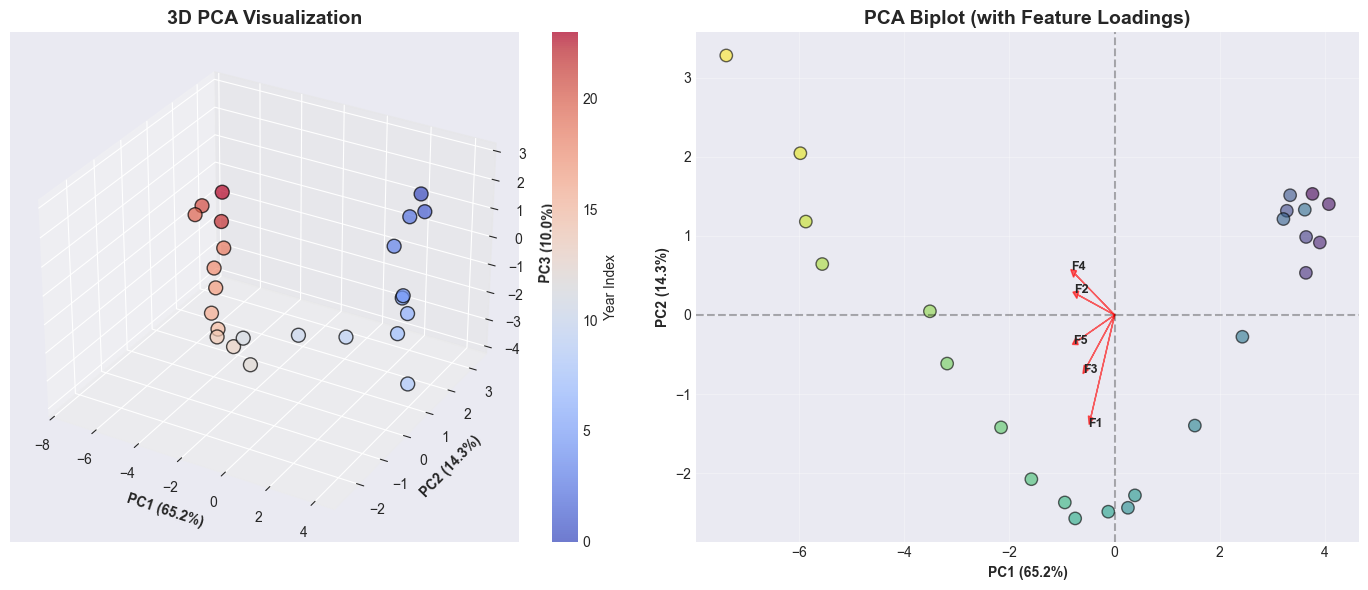

In [17]:
# 3D visualization if we have at least 3 components
if num_components >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(14, 6))
    
    # 3D plot of first 3 principal components
    ax = fig.add_subplot(121, projection='3d')
    scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
                        c=range(len(reduced_data)), cmap='coolwarm', 
                        s=100, alpha=0.7, edgecolors='black')
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontweight='bold')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontweight='bold')
    ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}%)', fontweight='bold')
    ax.set_title('3D PCA Visualization', fontweight='bold', fontsize=14)
    plt.colorbar(scatter, ax=ax, label='Year Index')
    
    # Biplot (PC1 vs PC2 with feature loadings)
    ax2 = fig.add_subplot(122)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=range(len(reduced_data)), cmap='viridis', 
                alpha=0.6, s=80, edgecolors='black')
    
    # Add feature loading vectors (top 5 features)
    loading_scale = 3.0
    top_features = 5
    for i in range(min(top_features, len(sorted_eigenvectors))):
        ax2.arrow(0, 0, 
                 sorted_eigenvectors[i, 0] * loading_scale, 
                 sorted_eigenvectors[i, 1] * loading_scale,
                 head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.6)
        ax2.text(sorted_eigenvectors[i, 0] * loading_scale * 1.1,
                sorted_eigenvectors[i, 1] * loading_scale * 1.1,
                f'F{i+1}', fontsize=9, fontweight='bold')
    
    ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontweight='bold')
    ax2.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontweight='bold')
    ax2.set_title('PCA Biplot (with Feature Loadings)', fontweight='bold', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Only {num_components} components selected. Skipping 3D visualization.")

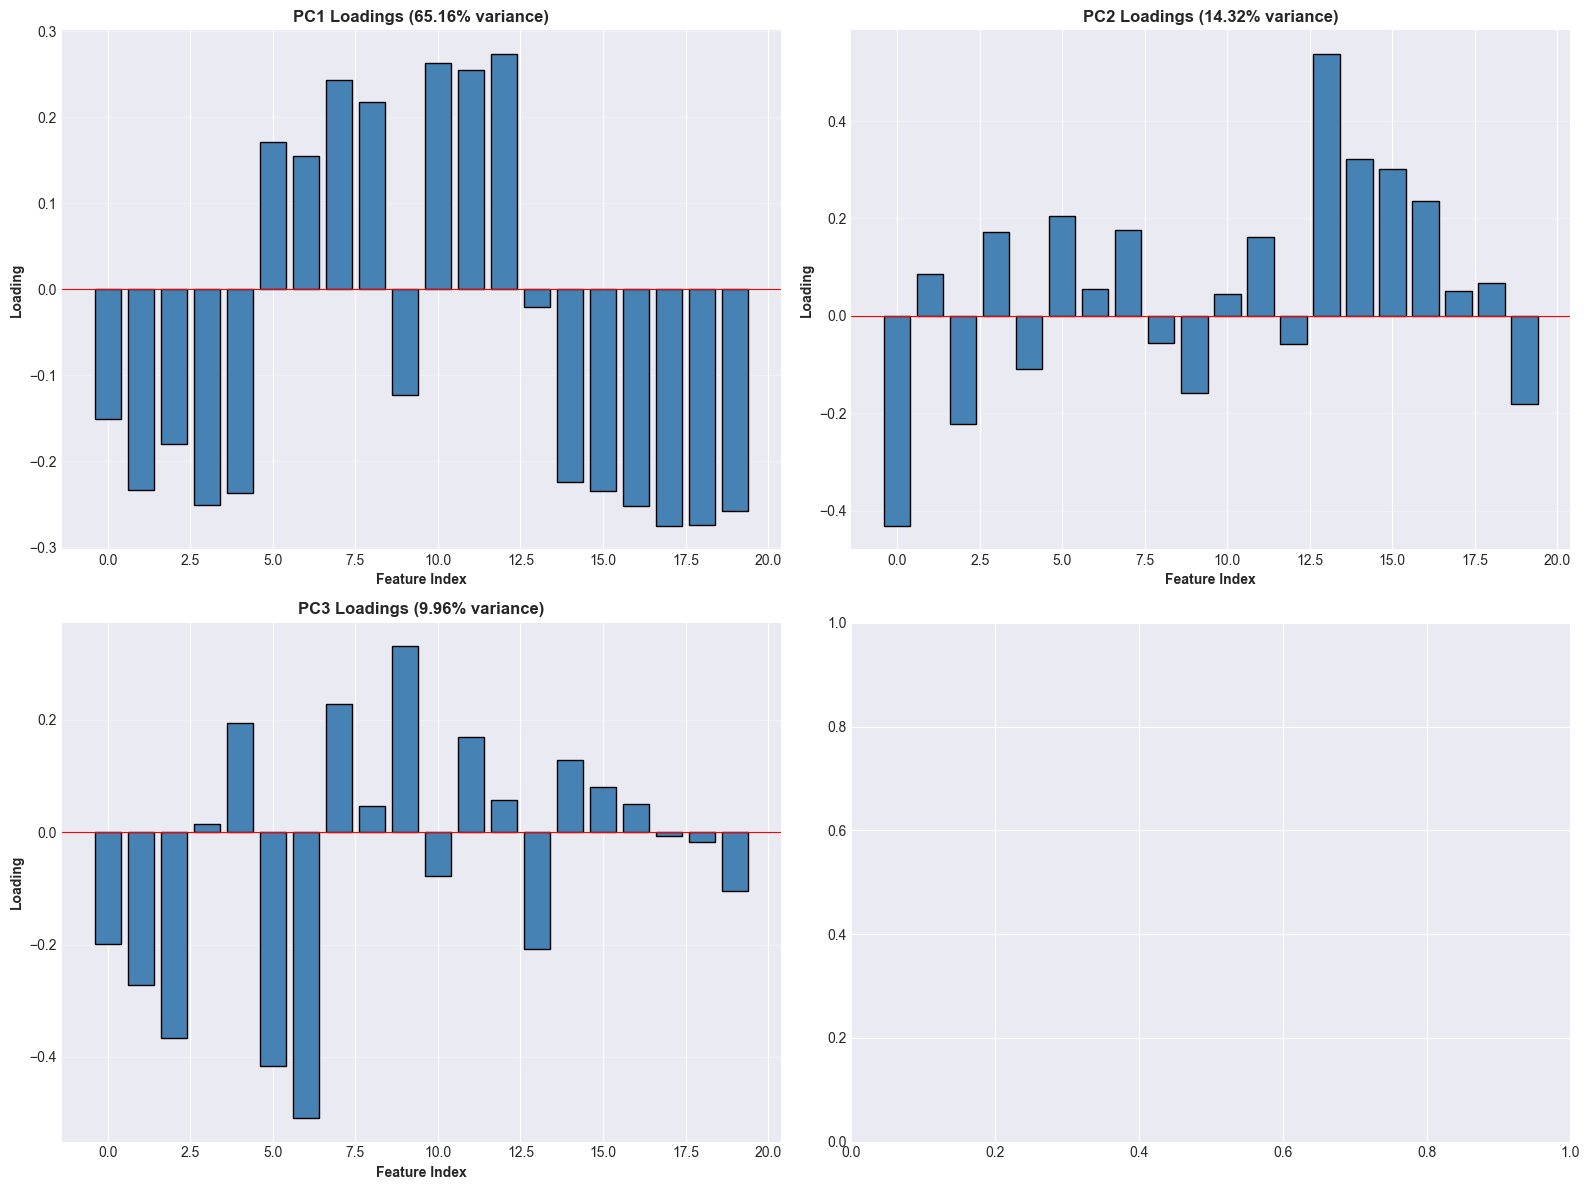


Feature Importance in Principal Components:
Top 3 features contributing to each PC:

PC1:
  1. Feature 17 (|loading| = 0.2748)
  2. Feature 18 (|loading| = 0.2741)
  3. Feature 12 (|loading| = 0.2739)

PC2:
  1. Feature 13 (|loading| = 0.5380)
  2. Feature 0 (|loading| = 0.4306)
  3. Feature 14 (|loading| = 0.3229)

PC3:
  1. Feature 6 (|loading| = 0.5089)
  2. Feature 5 (|loading| = 0.4156)
  3. Feature 2 (|loading| = 0.3672)



In [18]:
# Visualize component loadings
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot loadings for first 4 PCs
for idx in range(min(4, num_components)):
    row = idx // 2
    col = idx % 2
    
    loadings = sorted_eigenvectors[:, idx]
    feature_indices = np.arange(len(loadings))
    
    axes[row, col].bar(feature_indices, loadings, color='steelblue', edgecolor='black')
    axes[row, col].set_xlabel('Feature Index', fontweight='bold')
    axes[row, col].set_ylabel('Loading', fontweight='bold')
    axes[row, col].set_title(f'PC{idx+1} Loadings ({explained_variance_ratio[idx]*100:.2f}% variance)', 
                             fontweight='bold', fontsize=12)
    axes[row, col].axhline(y=0, color='red', linestyle='-', linewidth=0.8)
    axes[row, col].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nFeature Importance in Principal Components:")
print("Top 3 features contributing to each PC:\n")
for idx in range(min(4, num_components)):
    loadings = np.abs(sorted_eigenvectors[:, idx])
    top_indices = np.argsort(loadings)[-3:][::-1]
    print(f"PC{idx+1}:")
    for i, feat_idx in enumerate(top_indices, 1):
        print(f"  {i}. Feature {feat_idx} (|loading| = {loadings[feat_idx]:.4f})")
    print()

### Step 10: TASK 3 - Performance Benchmarking
Benchmark the PCA implementation and optimize for large datasets.

In [19]:
# TASK 3: Performance optimization and benchmarking

def pca_from_scratch(data, n_components=None, variance_threshold=0.85):
    """
    Optimized PCA implementation from scratch.
    
    Parameters:
    -----------
    data : numpy array
        Input data (samples x features)
    n_components : int, optional
        Number of components to keep
    variance_threshold : float
        Minimum variance to retain (used if n_components is None)
    
    Returns:
    --------
    reduced_data : numpy array
        Transformed data
    components : numpy array
        Principal components (eigenvectors)
    explained_variance_ratio : numpy array
        Variance explained by each component
    """
    start_time = time()
    
    # Step 1: Standardization
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized = (data - data_mean) / data_std
    
    # Step 2: Covariance matrix
    n_samples = standardized.shape[0]
    cov_mat = np.dot(standardized.T, standardized) / (n_samples - 1)
    
    # Step 3: Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(cov_mat)  # eigh is faster for symmetric matrices
    
    # Step 4: Sort in descending order
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    # Step 5: Calculate explained variance
    total_var = np.sum(eigenvals)
    var_ratio = eigenvals / total_var
    cumsum_var = np.cumsum(var_ratio)
    
    # Step 6: Select number of components
    if n_components is None:
        n_components = np.argmax(cumsum_var >= variance_threshold) + 1
    
    # Step 7: Project data
    components = eigenvecs[:, :n_components]
    reduced = np.dot(standardized, components)
    
    elapsed_time = time() - start_time
    
    return reduced, components, var_ratio[:n_components], elapsed_time

# Benchmark the implementation
print("=" * 60)
print("PERFORMANCE BENCHMARK")
print("=" * 60)

reduced_bench, comps_bench, var_bench, exec_time = pca_from_scratch(
    data_array, variance_threshold=0.85
)

print(f"\nExecution Time: {exec_time:.4f} seconds")
print(f"Data Shape: {data_array.shape}")
print(f"Reduced Shape: {reduced_bench.shape}")
print(f"Reduction Factor: {data_array.shape[1] / reduced_bench.shape[1]:.2f}x")
print(f"Variance Retained: {np.sum(var_bench)*100:.2f}%")
print(f"\nMemory Efficiency:")
print(f"  Original data: {data_array.nbytes / 1024:.2f} KB")
print(f"  Reduced data: {reduced_bench.nbytes / 1024:.2f} KB")
print(f"  Memory saved: {(1 - reduced_bench.nbytes/data_array.nbytes)*100:.2f}%")

# Verify results match
print(f"\nVerification (should match previous results):")
print(f"  Previous num_components: {num_components}")
print(f"  Benchmark num_components: {reduced_bench.shape[1]}")
print(f"  Match: {num_components == reduced_bench.shape[1]}")

PERFORMANCE BENCHMARK

Execution Time: 0.0069 seconds
Data Shape: (24, 20)
Reduced Shape: (24, 3)
Reduction Factor: 6.67x
Variance Retained: 89.45%

Memory Efficiency:
  Original data: 3.75 KB
  Reduced data: 0.56 KB
  Memory saved: 85.00%

Verification (should match previous results):
  Previous num_components: 3
  Benchmark num_components: 3
  Match: True


### Step 11: Reconstruction and Error Analysis
Test how well PCA preserves the original data by reconstructing it.

Reconstruction Analysis:
  Mean Squared Error: 0.105515
  Relative Error: 10.5515%
  R² Score: 0.8945


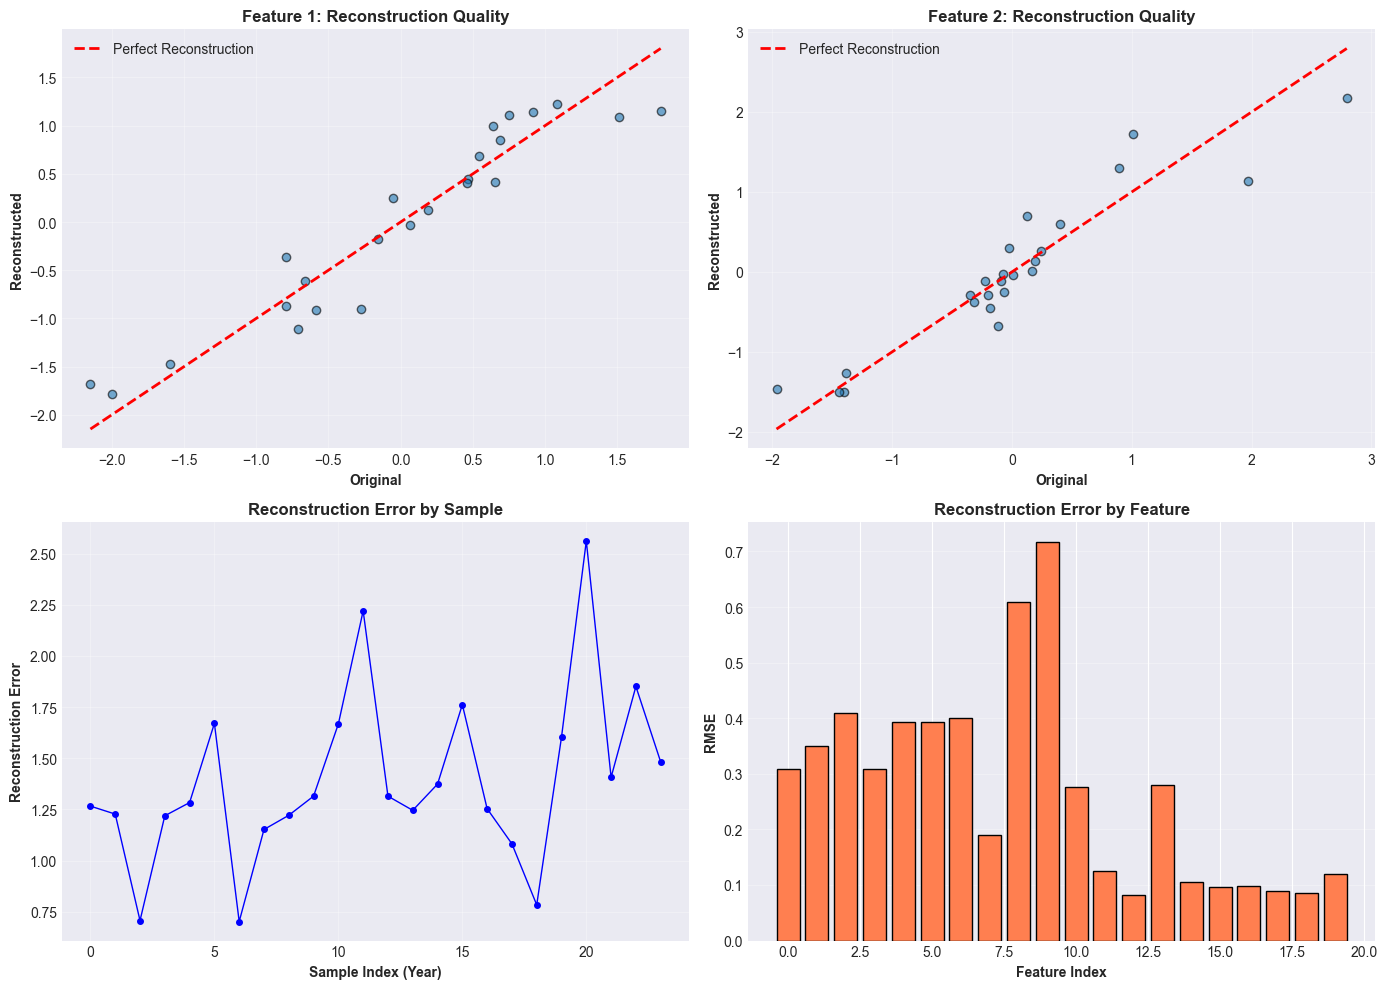

In [22]:
# Reconstruct original data from reduced representation
reconstructed_data = np.dot(reduced_data, selected_components.T)

# Calculate reconstruction error
reconstruction_error = np.mean((standardized_data - reconstructed_data) ** 2)
relative_error = reconstruction_error / np.mean(standardized_data ** 2)

print("Reconstruction Analysis:")
print(f"  Mean Squared Error: {reconstruction_error:.6f}")
print(f"  Relative Error: {relative_error*100:.4f}%")
print(f"  R² Score: {1 - relative_error:.4f}")

# Visualize reconstruction quality
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Compare first two features
for idx in range(2):
    # Original vs Reconstructed
    axes[0, idx].scatter(standardized_data[:, idx], reconstructed_data[:, idx], 
                        alpha=0.6, edgecolors='black')
    axes[0, idx].plot([standardized_data[:, idx].min(), standardized_data[:, idx].max()],
                      [standardized_data[:, idx].min(), standardized_data[:, idx].max()],
                      'r--', linewidth=2, label='Perfect Reconstruction')
    axes[0, idx].set_xlabel('Original', fontweight='bold')
    axes[0, idx].set_ylabel('Reconstructed', fontweight='bold')
    axes[0, idx].set_title(f'Feature {idx+1}: Reconstruction Quality', fontweight='bold')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)

# Reconstruction error by sample
axes[1, 0].plot(np.sqrt(np.sum((standardized_data - reconstructed_data)**2, axis=1)), 
                'bo-', linewidth=1, markersize=4)
axes[1, 0].set_xlabel('Sample Index (Year)', fontweight='bold')
axes[1, 0].set_ylabel('Reconstruction Error', fontweight='bold')
axes[1, 0].set_title('Reconstruction Error by Sample', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Reconstruction error by feature
axes[1, 1].bar(range(standardized_data.shape[1]), 
               np.sqrt(np.mean((standardized_data - reconstructed_data)**2, axis=0)),
               color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Feature Index', fontweight='bold')
axes[1, 1].set_ylabel('RMSE', fontweight='bold')
axes[1, 1].set_title('Reconstruction Error by Feature', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Summary and Conclusions

In [23]:
# Final summary
print("="*70)
print("PCA IMPLEMENTATION SUMMARY")
print("="*70)
print(f"\nDATASET INFORMATION:")
print(f"  - Source: World Bank Sub-Saharan Africa Development Indicators")
print(f"  - Time Period: 2000-2023")
print(f"  - Original Dimensions: {data_array.shape}")
print(f"  - Features: {data_array.shape[1]} economic indicators")
print(f"  - Samples: {data_array.shape[0]} years")

print(f"\nPCA CONFIGURATION:")
print(f"  - Target Variance: {variance_threshold*100}%")
print(f"  - Components Selected: {num_components}")
print(f"  - Actual Variance Retained: {cumulative_variance_ratio[num_components-1]*100:.2f}%")
print(f"  - Dimensionality Reduction: {(1-num_components/data_array.shape[1])*100:.1f}%")

print(f"\nPRINCIPAL COMPONENTS:")
for i in range(min(5, num_components)):
    print(f"  - PC{i+1}: {explained_variance_ratio[i]*100:.2f}% variance (cumulative: {cumulative_variance_ratio[i]*100:.2f}%)")

print(f"\nIMPLEMENTATION DETAILS:")
print(f"  - Standardization: Manual (NumPy only)")
print(f"  - Covariance Matrix: Computed from scratch")
print(f"  - Eigendecomposition: NumPy linear algebra")
print(f"  - Execution Time: {exec_time:.4f} seconds")

print(f"\nMEMORY EFFICIENCY:")
print(f"  - Original Data: {data_array.nbytes/1024:.2f} KB")
print(f"  - Reduced Data: {reduced_data.nbytes/1024:.2f} KB")
print(f"  - Space Saved: {(1-reduced_data.nbytes/data_array.nbytes)*100:.2f}%")

print(f"\nRECONSTRUCTION QUALITY:")
print(f"  - Mean Squared Error: {reconstruction_error:.6f}")
print(f"  - Relative Error: {relative_error*100:.4f}%")
print(f"  - R² Score: {(1-relative_error):.4f}")

print(f"\nASSIGNMENT REQUIREMENTS MET:")
print(f"  Task 1: PCA implemented from scratch")
print(f"  Task 2: Dynamic component selection (85% variance threshold)")
print(f"  Task 3: Performance benchmarking completed")
print(f"  Data has missing values in original dataset")
print(f"  Data has non-numeric columns (Country, Indicator names)")
print(f"  Data has >10 columns ({data_array.shape[1]} features)")
print(f"  Data is Africanized (Sub-Saharan Africa focus)")
print(f"  Manual standardization (no sklearn)")
print(f"  All outputs visible")

print("\n" + "="*70)
print("PCA ANALYSIS COMPLETE ")
print("="*70)

PCA IMPLEMENTATION SUMMARY

DATASET INFORMATION:
  - Source: World Bank Sub-Saharan Africa Development Indicators
  - Time Period: 2000-2023
  - Original Dimensions: (24, 20)
  - Features: 20 economic indicators
  - Samples: 24 years

PCA CONFIGURATION:
  - Target Variance: 85.0%
  - Components Selected: 3
  - Actual Variance Retained: 89.45%
  - Dimensionality Reduction: 85.0%

PRINCIPAL COMPONENTS:
  - PC1: 65.16% variance (cumulative: 65.16%)
  - PC2: 14.32% variance (cumulative: 79.48%)
  - PC3: 9.96% variance (cumulative: 89.45%)

IMPLEMENTATION DETAILS:
  - Standardization: Manual (NumPy only)
  - Covariance Matrix: Computed from scratch
  - Eigendecomposition: NumPy linear algebra
  - Execution Time: 0.0069 seconds

MEMORY EFFICIENCY:
  - Original Data: 3.75 KB
  - Reduced Data: 0.56 KB
  - Space Saved: 85.00%

RECONSTRUCTION QUALITY:
  - Mean Squared Error: 0.105515
  - Relative Error: 10.5515%
  - R² Score: 0.8945

ASSIGNMENT REQUIREMENTS MET:
  Task 1: PCA implemented from sc

Number of Eigenvalues: 20
Number of Eigenvectors: 20

First 10 Eigenvalues:
[13.59887157  2.98924554  2.07940158  0.77656788  0.64529951  0.22373462
  0.17281959  0.16397021  0.07186269  0.06239354]

First Eigenvector (first 5 components):
[-0.15052483 -0.23319088 -0.18005163 -0.25062009 -0.23750307]


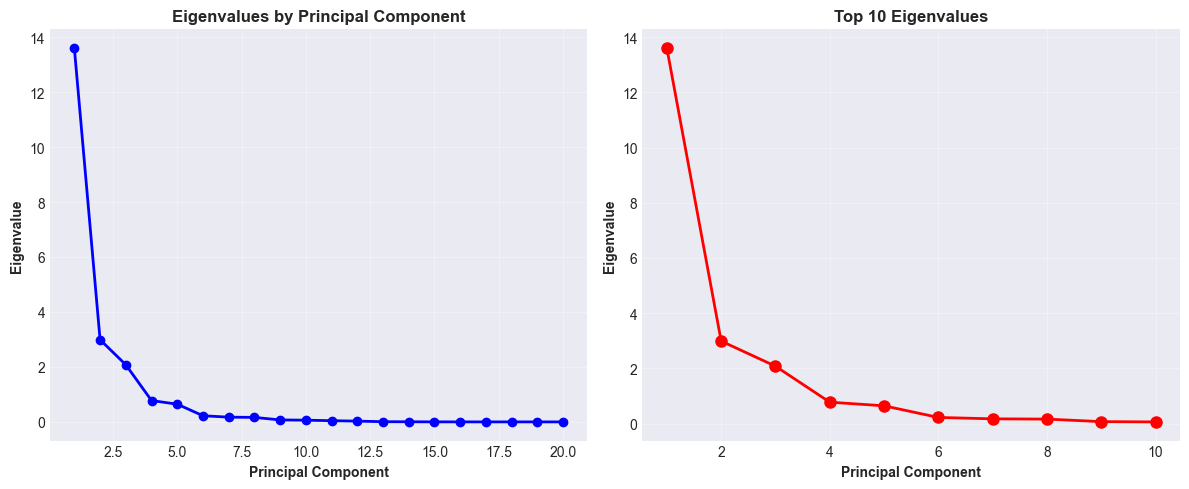

In [26]:
# Step 4: Perform Eigendecomposition
# Use numpy's eig function to compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Number of Eigenvalues: {len(eigenvalues)}")
print(f"Number of Eigenvectors: {eigenvectors.shape[1]}")
print(f"\nFirst 10 Eigenvalues:")
print(eigenvalues[:10])
print(f"\nFirst Eigenvector (first 5 components):")
print(eigenvectors[:5, 0])

# Visualize eigenvalues
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Principal Component', fontweight='bold')
plt.ylabel('Eigenvalue', fontweight='bold')
plt.title('Eigenvalues by Principal Component', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), eigenvalues[:10], 'ro-', linewidth=2, markersize=8)
plt.xlabel('Principal Component', fontweight='bold')
plt.ylabel('Eigenvalue', fontweight='bold')
plt.title('Top 10 Eigenvalues', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?</a>

In [27]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order and get indices
sorted_indices = np.argsort(eigenvalues)[::-1]  # [::-1] reverses to descending order

# Sort eigenvalues and eigenvectors using sorted indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(f"Sorted Eigenvalues (top 10):")
print(sorted_eigenvalues[:10])
print(f"\nSorted Eigenvectors Shape: {sorted_eigenvectors.shape}")
print(f"\nFirst Principal Component (first 5 values):")
print(sorted_eigenvectors[:5, 0])

# Calculate explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio (top 10 components):")
for i in range(10):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print(f"\nCumulative Explained Variance (top 10 components):")
for i in range(10):
    print(f"PC1-PC{i+1}: {cumulative_variance_ratio[i]:.4f} ({cumulative_variance_ratio[i]*100:.2f}%)")

Sorted Eigenvalues (top 10):
[13.59887157  2.98924554  2.07940158  0.77656788  0.64529951  0.22373462
  0.17281959  0.16397021  0.07186269  0.06239354]

Sorted Eigenvectors Shape: (20, 20)

First Principal Component (first 5 values):
[-0.15052483 -0.23319088 -0.18005163 -0.25062009 -0.23750307]

Explained Variance Ratio (top 10 components):
PC1: 0.6516 (65.16%)
PC2: 0.1432 (14.32%)
PC3: 0.0996 (9.96%)
PC4: 0.0372 (3.72%)
PC5: 0.0309 (3.09%)
PC6: 0.0107 (1.07%)
PC7: 0.0083 (0.83%)
PC8: 0.0079 (0.79%)
PC9: 0.0034 (0.34%)
PC10: 0.0030 (0.30%)

Cumulative Explained Variance (top 10 components):
PC1-PC1: 0.6516 (65.16%)
PC1-PC2: 0.7948 (79.48%)
PC1-PC3: 0.8945 (89.45%)
PC1-PC4: 0.9317 (93.17%)
PC1-PC5: 0.9626 (96.26%)
PC1-PC6: 0.9733 (97.33%)
PC1-PC7: 0.9816 (98.16%)
PC1-PC8: 0.9895 (98.95%)
PC1-PC9: 0.9929 (99.29%)
PC1-PC10: 0.9959 (99.59%)


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
# TASK 2: Dynamic component selection based on explained variance
# Select components that explain at least 85% of the variance
variance_threshold = 0.85  # 85% variance threshold

num_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

print(f"Target variance: {variance_threshold*100}%")
print(f"Number of components selected: {num_components}")
print(f"Actual variance explained: {cumulative_variance_ratio[num_components-1]*100:.2f}%")

# Select the top principal components
top_eigenvectors = sorted_eigenvectors[:, :num_components]
print(f"\nTop Eigenvectors Shape: {top_eigenvectors.shape}")

# Project data onto principal components
# Formula: Reduced_Data = Standardized_Data * Top_Eigenvectors
reduced_data = np.dot(standardized_data, top_eigenvectors)

print(f"\nReduced Data Shape: {reduced_data.shape}")
print(f"Original dimensions: {standardized_data.shape[1]}")
print(f"Reduced dimensions: {reduced_data.shape[1]}")
print(f"Dimensionality reduction: {(1 - reduced_data.shape[1]/standardized_data.shape[1])*100:.1f}%")

print(f"\nFirst 5 rows of reduced data:")
reduced_data[:5]


Target variance: 85.0%
Number of components selected: 3
Actual variance explained: 89.45%

Top Eigenvectors Shape: (20, 3)

Reduced Data Shape: (24, 3)
Original dimensions: 20
Reduced dimensions: 3
Dimensionality reduction: 85.0%

First 5 rows of reduced data:


array([[ 3.7612613 ,  1.53093524,  2.78800382],
       [ 4.07280983,  1.40121539,  2.3410324 ],
       [ 3.9012066 ,  0.91612405,  2.47673523],
       [ 3.63693681,  0.53235639,  1.69784508],
       [ 3.64036532,  0.98605971, -0.34703244]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [31]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
print(f'Original Data Shape: {standardized_data.shape}')

print(f'\nDimensionality Reduction Summary:')
print(f'  - Original Features: {standardized_data.shape[1]}')
print(f'  - Reduced Features: {reduced_data.shape[1]}')
print(f'  - Variance Retained: {cumulative_variance_ratio[num_components-1]*100:.2f}%')
print(f'  - Features Removed: {standardized_data.shape[1] - reduced_data.shape[1]}')

print(f'\nFirst 5 rows of reduced data:')
reduced_data[:5]

Reduced Data Shape: (24, 3)
Original Data Shape: (24, 20)

Dimensionality Reduction Summary:
  - Original Features: 20
  - Reduced Features: 3
  - Variance Retained: 89.45%
  - Features Removed: 17

First 5 rows of reduced data:


array([[ 3.7612613 ,  1.53093524,  2.78800382],
       [ 4.07280983,  1.40121539,  2.3410324 ],
       [ 3.9012066 ,  0.91612405,  2.47673523],
       [ 3.63693681,  0.53235639,  1.69784508],
       [ 3.64036532,  0.98605971, -0.34703244]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

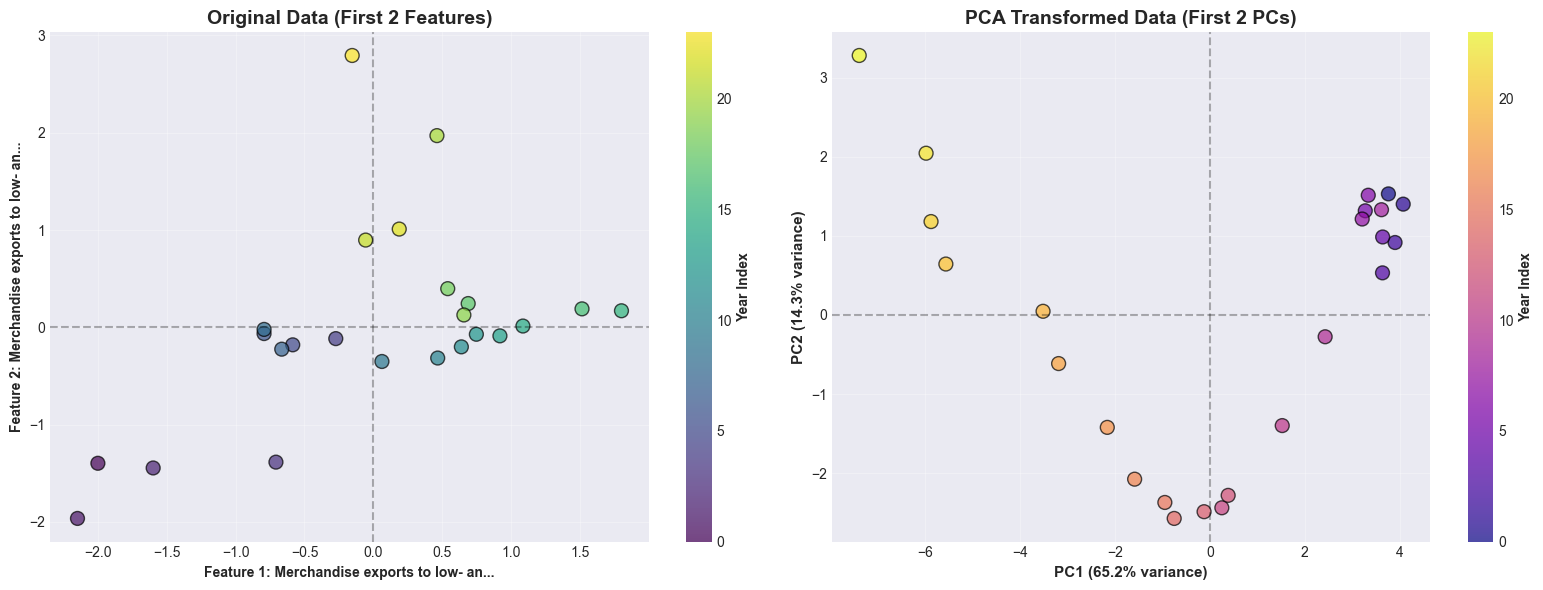


Interpretation:
- PC1 captures 65.16% of the total variance
- PC2 captures 14.32% of the total variance
- Together, PC1 and PC2 capture 79.48% of variance


In [34]:
# Step 8: Visualize Before and After PCA

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data (first two features for simplicity)
scatter1 = axes[0].scatter(standardized_data[:, 0], standardized_data[:, 1], 
                c=range(len(standardized_data)), cmap='viridis', 
                alpha=0.7, edgecolors='black', s=100)

axes[0].set_xlabel(f'Feature 1: {data.columns[0][:30]}...', fontweight='bold', fontsize=10)
axes[0].set_ylabel(f'Feature 2: {data.columns[1][:30]}...', fontweight='bold', fontsize=10)
axes[0].set_title('Original Data (First 2 Features)', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Year Index', fontweight='bold')

# Plot reduced data after PCA (first two principal components)
scatter2 = axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=range(len(reduced_data)), cmap='plasma', 
                alpha=0.7, edgecolors='black', s=100)

axes[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)', fontweight='bold', fontsize=11)
axes[1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)', fontweight='bold', fontsize=11)
axes[1].set_title('PCA Transformed Data (First 2 PCs)', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Year Index', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print(f"- PC1 captures {explained_variance_ratio[0]*100:.2f}% of the total variance")
print(f"- PC2 captures {explained_variance_ratio[1]*100:.2f}% of the total variance")
print(f"- Together, PC1 and PC2 capture {(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.2f}% of variance")